# Area Timm Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
timm_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/Timm Area.csv')

Sample sizes

In [8]:
timm_df.groupby(['Genotype'])['Mean Area'].count()

Genotype
KO    30
WT    30
Name: Mean Area, dtype: int64

In [4]:
timm_df.columns

Index(['Subject', 'Genotype', 'Sex', 'Level', 'Left', 'Right', 'Mean Area'], dtype='object')

In [5]:
pg.normality(data = timm_df, dv = 'Mean Area', group = 'Genotype')

,W,pval,normal
WT,0.935588,0.069223,True
KO,0.960454,0.318153,True


In [9]:
pg.ttest(timm_df['Mean Area'][timm_df['Genotype']=='WT'], timm_df['Mean Area'][timm_df['Genotype']=='KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-4.091955,58,two-sided,0.000134,"[-33087.4, -11349.57]",1.056538,172.227,0.98046


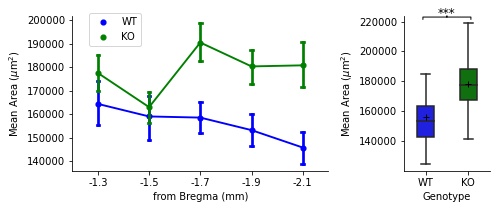

In [10]:
timm_fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(7, 3))
timm_point = sns.pointplot(x='Level', y='Mean Area', hue='Genotype', data=timm_df, palette=[
                           'b', 'g'], capsize=.05, scale=.7, errorwidth=.05, ci=68, ax=a0, label=['a', 'b'])
a0.set_ylabel(r'Mean Area ($\mu$m$^2$)')
a0.set_xlabel('from Bregma (mm)')
a0.invert_xaxis()
sns.despine()
timm_point.get_legend().remove()
timm_fig.legend(loc='upper right', bbox_to_anchor=(.29, .93), ncol=1)
timm_total = sns.boxplot(x='Genotype', y='Mean Area', data=timm_df,
                         palette=['b', 'g'], ax=a1, showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, showfliers = False)
a1.set_ylabel(r'Mean Area ($\mu$m$^2$)')
a1.annotate('***', xy=(0.5, .99), xytext=(0.5, .97), xycoords='axes fraction', fontsize=12, ha='center',
            va='bottom', arrowprops=dict(arrowstyle='-[, widthB= 2, lengthB=.2', lw=1, color='black'))
#a1.set_ylim(0, 20000)
plt.tight_layout()

In [18]:
timm_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/timm_area.svg')